In [1]:
import keras

from keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from keras.models import Model
from keras import regularizers
from keras import backend as K

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
latent_dim=32

# this is our input placeholder
input_img = Input(shape=(784,))

In [3]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

In [5]:
# "encoded" is the encoded representation of the input
# DENSE VERSION:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [6]:
z_mean = layers.Dense(latent_dim)(encoded)
z_log_var = layers.Dense(latent_dim)(encoded)
z = layers.Lambda(sampling)([z_mean, z_log_var])

In [8]:
# "decoded" is the lossy reconstruction of the input
# DENSE VERSION:
decoded = Dense(784, activation='sigmoid')(z) #(encoded)
autoencoder = Model(input_img,decoded)

In [9]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# create the decoder model
decoder_vis = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
def vae_loss(x, x_decoded_mean):
    xent_loss = keras.metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

In [11]:
autoencoder.compile(optimizer='adadelta', loss=vae_loss) #loss=vae_loss)#loss='binary_crossentropy')

In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [23]:
history = autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 19s 320us/step - loss: 0.3182 - val_loss: 0.3179
Epoch 2/500
60000/60000 [==============================] - 17s 276us/step - loss: 0.3176 - val_loss: 0.3182
Epoch 3/500
60000/60000 [==============================] - 14s 230us/step - loss: 0.3171 - val_loss: 0.3171
Epoch 4/500
60000/60000 [==============================] - 15s 249us/step - loss: 0.3167 - val_loss: 0.3160
Epoch 5/500
60000/60000 [==============================] - 15s 254us/step - loss: 0.3160 - val_loss: 0.3153
Epoch 6/500
60000/60000 [==============================] - 15s 247us/step - loss: 0.3160 - val_loss: 0.3158
Epoch 7/500
60000/60000 [==============================] - 12s 199us/step - loss: 0.3147 - val_loss: 0.3152
Epoch 8/500
60000/60000 [==============================] - 13s 211us/step - loss: 0.3149 - val_loss: 0.3145
Epoch 9/500
60000/60000 [==============================] - 14s 228us/step - loss: 0.31

Epoch 76/500
60000/60000 [==============================] - 18s 306us/step - loss: 0.2927 - val_loss: 0.2929
Epoch 77/500
60000/60000 [==============================] - 18s 297us/step - loss: 0.2925 - val_loss: 0.2927
Epoch 78/500
60000/60000 [==============================] - 18s 293us/step - loss: 0.2923 - val_loss: 0.2923
Epoch 79/500
60000/60000 [==============================] - 18s 301us/step - loss: 0.2923 - val_loss: 0.2917
Epoch 80/500
60000/60000 [==============================] - 19s 317us/step - loss: 0.2918 - val_loss: 0.2915
Epoch 81/500
60000/60000 [==============================] - 18s 294us/step - loss: 0.2917 - val_loss: 0.2912
Epoch 82/500
60000/60000 [==============================] - 19s 317us/step - loss: 0.2915 - val_loss: 0.2910
Epoch 83/500
60000/60000 [==============================] - 18s 298us/step - loss: 0.2914 - val_loss: 0.2904
Epoch 84/500
60000/60000 [==============================] - 19s 312us/step - loss: 0.2908 - val_loss: 0.2906
Epoch 85/500
60000/

60000/60000 [==============================] - 25s 412us/step - loss: 0.2794 - val_loss: 0.2787
Epoch 151/500
60000/60000 [==============================] - 18s 304us/step - loss: 0.2792 - val_loss: 0.2791
Epoch 152/500
60000/60000 [==============================] - 18s 295us/step - loss: 0.2793 - val_loss: 0.2785
Epoch 153/500
60000/60000 [==============================] - 19s 309us/step - loss: 0.2791 - val_loss: 0.2788
Epoch 154/500
60000/60000 [==============================] - 20s 341us/step - loss: 0.2790 - val_loss: 0.2788
Epoch 155/500
60000/60000 [==============================] - 23s 386us/step - loss: 0.2787 - val_loss: 0.2786
Epoch 156/500
60000/60000 [==============================] - 20s 330us/step - loss: 0.2785 - val_loss: 0.2784
Epoch 157/500
60000/60000 [==============================] - 18s 296us/step - loss: 0.2784 - val_loss: 0.2786
Epoch 158/500
60000/60000 [==============================] - 19s 322us/step - loss: 0.2785 - val_loss: 0.2781
Epoch 159/500
60000/6000

60000/60000 [==============================] - 18s 294us/step - loss: 0.2721 - val_loss: 0.2719
Epoch 225/500
60000/60000 [==============================] - 17s 287us/step - loss: 0.2721 - val_loss: 0.2717
Epoch 226/500
60000/60000 [==============================] - 17s 288us/step - loss: 0.2720 - val_loss: 0.2718
Epoch 227/500
60000/60000 [==============================] - 19s 313us/step - loss: 0.2718 - val_loss: 0.2716
Epoch 228/500
60000/60000 [==============================] - 18s 299us/step - loss: 0.2718 - val_loss: 0.2715
Epoch 229/500
60000/60000 [==============================] - 19s 317us/step - loss: 0.2717 - val_loss: 0.2716
Epoch 230/500
60000/60000 [==============================] - 18s 295us/step - loss: 0.2716 - val_loss: 0.2720
Epoch 231/500
60000/60000 [==============================] - 17s 284us/step - loss: 0.2716 - val_loss: 0.2716
Epoch 232/500
60000/60000 [==============================] - 18s 305us/step - loss: 0.2716 - val_loss: 0.2714
Epoch 233/500
60000/6000

Epoch 299/500
60000/60000 [==============================] - 6s 107us/step - loss: 0.2677 - val_loss: 0.2674
Epoch 300/500
60000/60000 [==============================] - 6s 108us/step - loss: 0.2678 - val_loss: 0.2673
Epoch 301/500
60000/60000 [==============================] - 7s 115us/step - loss: 0.2678 - val_loss: 0.2671
Epoch 302/500
60000/60000 [==============================] - 6s 105us/step - loss: 0.2677 - val_loss: 0.2673
Epoch 303/500
60000/60000 [==============================] - 6s 98us/step - loss: 0.2677 - val_loss: 0.2672
Epoch 304/500
60000/60000 [==============================] - 6s 96us/step - loss: 0.2676 - val_loss: 0.2672
Epoch 305/500
60000/60000 [==============================] - 5s 85us/step - loss: 0.2675 - val_loss: 0.2674
Epoch 306/500
60000/60000 [==============================] - 5s 88us/step - loss: 0.2675 - val_loss: 0.2672
Epoch 307/500
60000/60000 [==============================] - 5s 89us/step - loss: 0.2676 - val_loss: 0.2674
Epoch 308/500
60000/6000

60000/60000 [==============================] - 3s 54us/step - loss: 0.2652 - val_loss: 0.2651
Epoch 375/500
60000/60000 [==============================] - 3s 55us/step - loss: 0.2653 - val_loss: 0.2649
Epoch 376/500
60000/60000 [==============================] - 4s 63us/step - loss: 0.2652 - val_loss: 0.2648
Epoch 377/500
60000/60000 [==============================] - 3s 56us/step - loss: 0.2652 - val_loss: 0.2649
Epoch 378/500
60000/60000 [==============================] - 3s 56us/step - loss: 0.2652 - val_loss: 0.2650
Epoch 379/500
60000/60000 [==============================] - 3s 56us/step - loss: 0.2652 - val_loss: 0.2649
Epoch 380/500
60000/60000 [==============================] - 4s 59us/step - loss: 0.2651 - val_loss: 0.2646
Epoch 381/500
60000/60000 [==============================] - 4s 60us/step - loss: 0.2651 - val_loss: 0.2647
Epoch 382/500
60000/60000 [==============================] - 3s 56us/step - loss: 0.2651 - val_loss: 0.2646
Epoch 383/500
60000/60000 [===============

Epoch 450/500
60000/60000 [==============================] - 4s 65us/step - loss: 0.2636 - val_loss: 0.2632
Epoch 451/500
60000/60000 [==============================] - 3s 55us/step - loss: 0.2636 - val_loss: 0.2631
Epoch 452/500
60000/60000 [==============================] - 3s 54us/step - loss: 0.2635 - val_loss: 0.2630
Epoch 453/500
60000/60000 [==============================] - 3s 57us/step - loss: 0.2636 - val_loss: 0.2632
Epoch 454/500
60000/60000 [==============================] - 3s 57us/step - loss: 0.2635 - val_loss: 0.2630
Epoch 455/500
60000/60000 [==============================] - 3s 57us/step - loss: 0.2635 - val_loss: 0.2630
Epoch 456/500
60000/60000 [==============================] - 3s 58us/step - loss: 0.2635 - val_loss: 0.2630
Epoch 457/500
60000/60000 [==============================] - 3s 55us/step - loss: 0.2635 - val_loss: 0.2630
Epoch 458/500
60000/60000 [==============================] - 3s 54us/step - loss: 0.2635 - val_loss: 0.2631
Epoch 459/500
60000/60000 [=

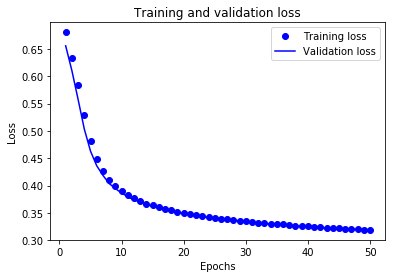

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 51)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

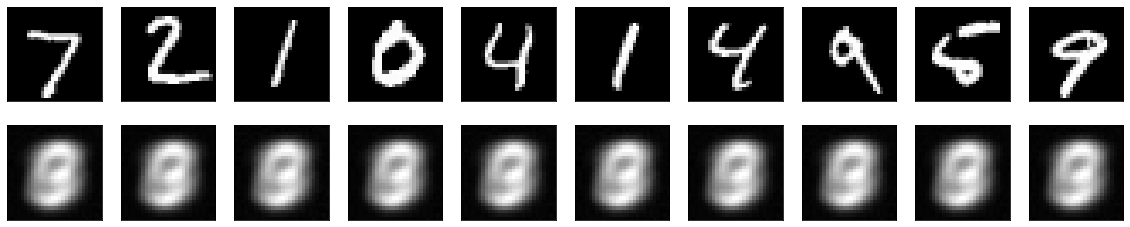

In [19]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder_vis.predict(encoded_imgs)

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [20]:
np.shape(encoded_imgs)

(10000, 32)